In [20]:
import pandas as pd
import geopandas as gpd
import os
import pathlib as pl
import numpy as np
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from shapely.geometry import Polygon

In [2]:
cwd = os.getcwd()
truth_dir = pl.Path('..','Refined_Truth_Model','Modflow_Input_Files').resolve()
base_model_grid_dir = pl.Path('..','Locations', 'Base_Model_Grid').resolve()
print(cwd)
print(truth_dir)
print(base_model_grid_dir)

C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook
C:\Users\farnut1\Desktop\How-Many-Realizations-main\Refined_Truth_Model\Modflow_Input_Files
C:\Users\farnut1\Desktop\How-Many-Realizations-main\Locations\Base_Model_Grid


In [3]:
# import true capture zone
true_cap = gpd.read_file(os.path.join(truth_dir, 'true_cap.shp'), engine='pyogrio')
# drop all but x, y and geometry
columns_to_keep = ['x','y','geometry']
columns_to_drop = true_cap.columns.difference(columns_to_keep)
true_cap = true_cap.drop(columns=columns_to_drop)
# set crs for joining
true_cap.set_crs(crs='EPSG:26915', inplace=True)
true_cap

,x,y,geometry
0,2115.62,8415.62,"POLYGON ((2112.5 8418.75, 2118.75 8418.75, 211..."
1,2121.88,8415.62,"POLYGON ((2118.75 8418.75, 2125 8418.75, 2125 ..."
2,2128.12,8415.62,"POLYGON ((2125 8418.75, 2131.25 8418.75, 2131...."
3,2134.38,8415.62,"POLYGON ((2131.25 8418.75, 2137.5 8418.75, 213..."
4,2140.62,8415.62,"POLYGON ((2137.5 8418.75, 2143.75 8418.75, 214..."
...,...,...,...
95818,2653.12,1309.38,"POLYGON ((2650 1312.5, 2656.25 1312.5, 2656.25..."
95819,2659.38,1309.38,"POLYGON ((2656.25 1312.5, 2662.5 1312.5, 2662...."
95820,2665.62,1309.38,"POLYGON ((2662.5 1312.5, 2668.75 1312.5, 2668...."
95821,2671.88,1309.38,"POLYGON ((2668.75 1312.5, 2675 1312.5, 2675 13..."


In [4]:
# import base model grid
base_model_grid = gpd.read_file(os.path.join(base_model_grid_dir,'Base_Model_Grid.shp'), engine='pyogrio')
# set crs for joining
base_model_grid.set_crs(crs='EPSG:26915', inplace=True)
base_model_grid

,node,row,column,idomain_1,x,y,geometry
0,1,1,1,1,12.5,9987.5,"POLYGON ((0 10000, 25 10000, 25 9975, 0 9975, ..."
1,2,1,2,1,37.5,9987.5,"POLYGON ((25 10000, 50 10000, 50 9975, 25 9975..."
2,3,1,3,1,62.5,9987.5,"POLYGON ((50 10000, 75 10000, 75 9975, 50 9975..."
3,4,1,4,1,87.5,9987.5,"POLYGON ((75 10000, 100 10000, 100 9975, 75 99..."
4,5,1,5,1,112.5,9987.5,"POLYGON ((100 10000, 125 10000, 125 9975, 100 ..."
...,...,...,...,...,...,...,...
79995,79996,400,196,0,4887.5,12.5,"POLYGON ((4875 25, 4900 25, 4900 0, 4875 0, 48..."
79996,79997,400,197,0,4912.5,12.5,"POLYGON ((4900 25, 4925 25, 4925 0, 4900 0, 49..."
79997,79998,400,198,0,4937.5,12.5,"POLYGON ((4925 25, 4950 25, 4950 0, 4925 0, 49..."
79998,79999,400,199,0,4962.5,12.5,"POLYGON ((4950 25, 4975 25, 4975 0, 4950 0, 49..."


In [5]:
# Join true cap with base model grid
true_cap_to_base_grid = gpd.sjoin(base_model_grid, true_cap, how='inner')
true_cap_to_base_grid.reset_index(drop=True, inplace=True)
true_cap_to_base_grid = true_cap_to_base_grid.drop_duplicates(subset=['node'])
true_cap_to_base_grid.reset_index(drop=True, inplace=True)
true_cap_to_base_grid = true_cap_to_base_grid.drop('index_right', axis=1)
true_cap_to_base_grid

,node,row,column,idomain_1,x_left,y_left,geometry,x_right,y_right
0,12680,64,80,1,1987.5,8412.5,"POLYGON ((1975 8425, 2000 8425, 2000 8400, 197...",1984.38,8396.88
1,12681,64,81,1,2012.5,8412.5,"POLYGON ((2000 8425, 2025 8425, 2025 8400, 200...",2003.12,8396.88
2,12682,64,82,1,2037.5,8412.5,"POLYGON ((2025 8425, 2050 8425, 2050 8400, 202...",2021.88,8396.88
3,12683,64,83,1,2062.5,8412.5,"POLYGON ((2050 8425, 2075 8425, 2075 8400, 205...",2053.12,8396.88
4,12684,64,84,1,2087.5,8412.5,"POLYGON ((2075 8425, 2100 8425, 2100 8400, 207...",2096.88,8396.88
...,...,...,...,...,...,...,...,...,...
6536,69508,348,108,1,2687.5,1312.5,"POLYGON ((2675 1325, 2700 1325, 2700 1300, 267...",2678.12,1309.38
6537,69509,348,109,1,2712.5,1312.5,"POLYGON ((2700 1325, 2725 1325, 2725 1300, 270...",2709.38,1315.62
6538,69510,348,110,1,2737.5,1312.5,"POLYGON ((2725 1325, 2750 1325, 2750 1300, 272...",2721.88,1315.62
6539,69511,348,111,1,2762.5,1312.5,"POLYGON ((2750 1325, 2775 1325, 2775 1300, 275...",2746.88,1321.88


In [6]:
true_cap = true_cap_to_base_grid.dissolve().explode()
true_cap.reset_index(drop=True, inplace=True)

In [7]:
# Export Grid outline
gridoutline_list = [[min(base_model_grid.bounds.minx), min(base_model_grid.bounds.miny)],[min(base_model_grid.bounds.minx), max(base_model_grid.bounds.maxy)],[max(base_model_grid.bounds.maxx), max(base_model_grid.bounds.maxy)],[max(base_model_grid.bounds.maxx), min(base_model_grid.bounds.miny)]]
gridoutline_geom = Polygon(gridoutline_list)
gridoutline_gpd = gpd.GeoDataFrame(index=[0], crs="EPSG:26915", geometry=[gridoutline_geom])

In [8]:
# export no flow cells
basegrid_noflow = base_model_grid[base_model_grid['idomain_1']<1]
basegrid_noflow = basegrid_noflow.dissolve(by='idomain_1')

In [13]:
# Get list of all folders in base_scenario_notebook folder
folders = [f.name for f in os.scandir(cwd) if f.is_dir()]

# Filter to just our possible scenarios
scenario_folders = []
for file in folders:
    if file.startswith('R25'):
        scenario_folders.append(file)
for file in folders:
    if file.startswith('C25'):
        scenario_folders.append(file)
for file in folders:
    if file.startswith('R100'):
        scenario_folders.append(file)
for file in folders:
    if file.startswith('C100'):
        scenario_folders.append(file)
print(scenario_folders)

['R25_pp10_real10', 'R25_pp10_real100', 'R25_pp10_real1000', 'R25_pp10_real2000', 'R25_pp10_real25', 'R25_pp10_real250', 'R25_pp10_real50', 'R25_pp10_real500', 'R25_pp25_real10', 'R25_pp25_real100', 'R25_pp25_real1000', 'R25_pp25_real2000', 'R25_pp25_real25', 'R25_pp25_real250', 'R25_pp25_real50', 'R25_pp25_real500', 'R25_pp50_real10', 'R25_pp50_real100', 'R25_pp50_real1000', 'R25_pp50_real2000', 'R25_pp50_real25', 'R25_pp50_real250', 'R25_pp50_real50', 'R25_pp50_real500', 'C25_pp10_real10', 'C25_pp10_real100', 'C25_pp10_real1000', 'C25_pp10_real2000', 'C25_pp10_real25', 'C25_pp10_real250', 'C25_pp10_real50', 'C25_pp10_real500', 'C25_pp25_real10', 'C25_pp25_real100', 'C25_pp25_real1000', 'C25_pp25_real2000', 'C25_pp25_real25', 'C25_pp25_real250', 'C25_pp25_real50', 'C25_pp25_real500', 'C25_pp50_real10', 'C25_pp50_real100', 'C25_pp50_real1000', 'C25_pp50_real2000', 'C25_pp50_real25', 'C25_pp50_real250', 'C25_pp50_real50', 'C25_pp50_real500', 'R100_pp10_real10', 'R100_pp10_real100', 'R10

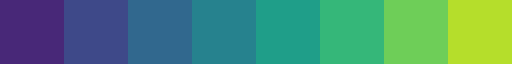

In [10]:
# # 15 viridis
# levels_legend = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# cmap = matplotlib.cm.viridis
# clrs_legend = []
# for step in np.linspace(0,1,10):
#     clrs_legend.append(matplotlib.colors.rgb2hex(cmap(step)))

# cmap_legend, norm_legend = matplotlib.colors.from_levels_and_colors(levels_legend, clrs_legend, extend='both')
# cmap_legend

In [11]:
# scenario_folders = ['R25_pp10_real100']

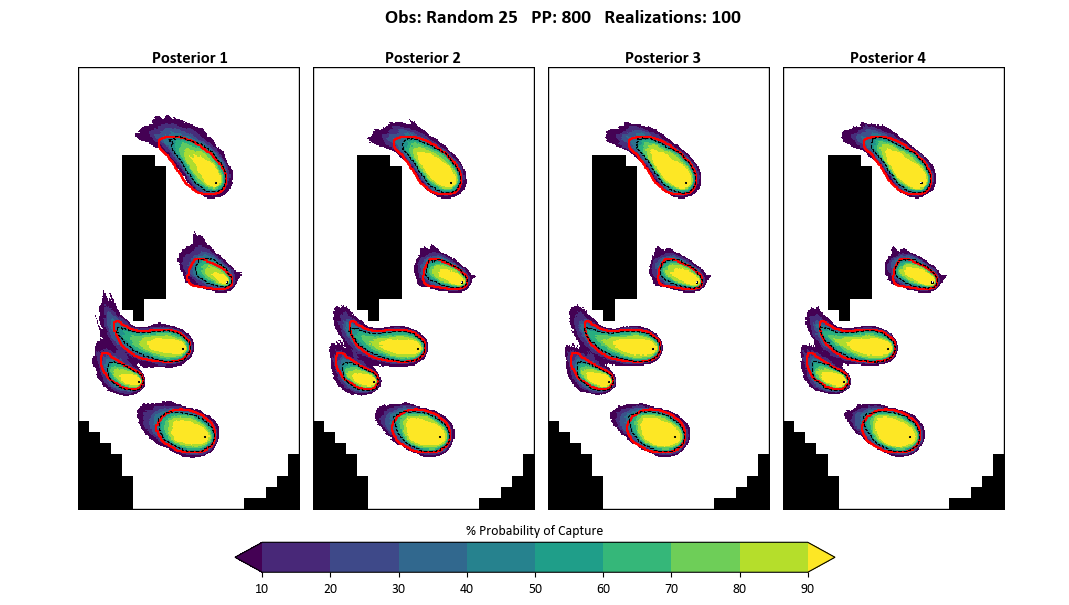

In [12]:
# for scenario in scenario_folders:
#     files = [f for f in os.listdir(scenario) if os.path.isfile(os.path.join(scenario,f))]
#     capzoneshpfiles = []
#     for file in files:
#         if file.startswith('R25_') and file.endswith('_rej.shp'):
#             capzoneshpfiles+=[os.path.join(scenario,file)]
#         if file.startswith('R100_') and file.endswith('_rej.shp'):
#             capzoneshpfiles+=[os.path.join(scenario,file)]
#         if file.startswith('C25_') and file.endswith('_rej.shp'):
#             capzoneshpfiles+=[os.path.join(scenario,file)]
#         if file.startswith('C100_') and file.endswith('_rej.shp'):
#             capzoneshpfiles+=[os.path.join(scenario,file)]
#     #print(capzoneshpfiles)

#     if capzoneshpfiles[0].startswith('R25_pp10'):
#         obs = 'Obs: Random 25'
#         pp = 'PP: 800'
#         filesave = 'R25_pp10'
#     if capzoneshpfiles[0].startswith('R100_pp10'):
#         obs = 'Obs: Random 100'
#         pp = 'PP: 800'
#         filesave = 'R100_pp10'
#     if capzoneshpfiles[0].startswith('C25_pp10'):
#         obs = 'Obs: Clustered 25'
#         pp = 'PP: 800'
#         filesave = 'C25_pp10'
#     if capzoneshpfiles[0].startswith('C100_pp10'):
#         obs = 'Obs: Clustered 100'
#         pp = 'PP: 800'
#         filesave = 'C100_pp10'
#     if capzoneshpfiles[0].startswith('R25_pp25'):
#         obs = 'Obs: Random 25'
#         pp = 'PP: 128'
#         filesave = 'R25_pp25'
#     if capzoneshpfiles[0].startswith('R100_pp25'):
#         obs = 'Obs: Random 100'
#         pp = 'PP: 128'
#         filesave = 'R100_pp25'
#     if capzoneshpfiles[0].startswith('C25_pp25'):
#         obs = 'Obs: Clustered 25'
#         pp = 'PP: 128'
#         filesave = 'C25_pp25'
#     if capzoneshpfiles[0].startswith('C100_pp25'):
#         obs = 'Obs: Clustered 100'
#         pp = 'PP: 128'
#         filesave = 'C100_pp25'
#     if capzoneshpfiles[0].startswith('R25_pp50'):
#         obs = 'Obs: Random 25'
#         pp = 'PP: 32'
#         filesave = 'R25_pp50'
#     if capzoneshpfiles[0].startswith('R100_pp50'):
#         obs = 'Obs: Random 100'
#         pp = 'PP: 32'
#         filesave = 'R100_pp50'
#     if capzoneshpfiles[0].startswith('C25_pp50'):
#         obs = 'Obs: Clustered 25'
#         pp = 'PP: 32'
#         filesave = 'C25_pp50'
#     if capzoneshpfiles[0].startswith('C100_pp50'):
#         obs = 'Obs: Clustered 100'
#         pp = 'PP: 32'
#         filesave = 'C100_pp50'

#     if scenario.endswith('real10'):
#         reals = 'Realizations: 10'
#     if scenario.endswith('real25'):
#         reals = 'Realizations: 25'
#     if scenario.endswith('real50'):
#         reals = 'Realizations: 50'
#     if scenario.endswith('real100'):
#         reals = 'Realizations: 100'
#     if scenario.endswith('real250'):
#         reals = 'Realizations: 250'
#     if scenario.endswith('real500'):
#         reals = 'Realizations: 500'
#     if scenario.endswith('real1000'):
#         reals = 'Realizations: 1000'
#     if scenario.endswith('real2000'):
#         reals = 'Realizations: 2000'

#     iter0files = []
#     for file in capzoneshpfiles:
#         if file.endswith('0_rej.shp'):
#             iter0files+=[os.path.join(file)]
    
#     iter1files = []
#     for file in capzoneshpfiles:
#         if file.endswith('1_rej.shp'):
#             iter1files+=[os.path.join(file)]
#     #print(iter1files)

#     iter2files = []
#     for file in capzoneshpfiles:
#         if file.endswith('2_rej.shp'):
#             iter2files+=[os.path.join(file)]

#     iter3files = []
#     for file in capzoneshpfiles:
#         if file.endswith('3_rej.shp'):
#             iter3files+=[os.path.join(file)]

#     iter4files = []
#     for file in capzoneshpfiles:
#         if file.endswith('4_rej.shp'):
#             iter4files+=[os.path.join(file)]

#     iter0gpd = gpd.read_file(iter0files[0], engine='pyogrio')
#     prob10_0 = iter0gpd[iter0gpd['prob']>=10]
#     prob10_0 = prob10_0.dissolve().explode()
#     prob20_0 = iter0gpd[iter0gpd['prob']>=20]
#     prob20_0 = prob20_0.dissolve().explode()
#     prob30_0 = iter0gpd[iter0gpd['prob']>=30]
#     prob30_0 = prob30_0.dissolve().explode()
#     prob40_0 = iter0gpd[iter0gpd['prob']>=40]
#     prob40_0 = prob40_0.dissolve().explode()
#     prob50_0 = iter0gpd[iter0gpd['prob']>=50]
#     prob50_0 = prob50_0.dissolve().explode()
#     prob60_0 = iter0gpd[iter0gpd['prob']>=60]
#     prob60_0 = prob60_0.dissolve().explode()
#     prob70_0 = iter0gpd[iter0gpd['prob']>=70]
#     prob70_0 = prob70_0.dissolve().explode()
#     prob80_0 = iter0gpd[iter0gpd['prob']>=80]
#     prob80_0 = prob80_0.dissolve().explode()
#     prob90_0 = iter0gpd[iter0gpd['prob']>=90]
#     prob90_0 = prob90_0.dissolve().explode()
    
#     iter1gpd = gpd.read_file(iter1files[0], engine='pyogrio')
#     prob10_1 = iter1gpd[iter1gpd['prob']>=10]
#     prob10_1 = prob10_1.dissolve().explode()
#     prob20_1 = iter1gpd[iter1gpd['prob']>=20]
#     prob20_1 = prob20_1.dissolve().explode()
#     prob30_1 = iter1gpd[iter1gpd['prob']>=30]
#     prob30_1 = prob30_1.dissolve().explode()
#     prob40_1 = iter1gpd[iter1gpd['prob']>=40]
#     prob40_1 = prob40_1.dissolve().explode()
#     prob50_1 = iter1gpd[iter1gpd['prob']>=50]
#     prob50_1 = prob50_1.dissolve().explode()
#     prob60_1 = iter1gpd[iter1gpd['prob']>=60]
#     prob60_1 = prob60_1.dissolve().explode()
#     prob70_1 = iter1gpd[iter1gpd['prob']>=70]
#     prob70_1 = prob70_1.dissolve().explode()
#     prob80_1 = iter1gpd[iter1gpd['prob']>=80]
#     prob80_1 = prob80_1.dissolve().explode()
#     prob90_1 = iter1gpd[iter1gpd['prob']>=90]
#     prob90_1 = prob90_1.dissolve().explode()
    
#     iter2gpd = gpd.read_file(iter2files[0], engine='pyogrio')
#     prob10_2 = iter2gpd[iter2gpd['prob']>=10]
#     prob10_2 = prob10_2.dissolve().explode()
#     prob20_2 = iter2gpd[iter2gpd['prob']>=20]
#     prob20_2 = prob20_2.dissolve().explode()
#     prob30_2 = iter2gpd[iter2gpd['prob']>=30]
#     prob30_2 = prob30_2.dissolve().explode()
#     prob40_2 = iter2gpd[iter2gpd['prob']>=40]
#     prob40_2 = prob40_2.dissolve().explode()
#     prob50_2 = iter2gpd[iter2gpd['prob']>=50]
#     prob50_2 = prob50_2.dissolve().explode()
#     prob60_2 = iter2gpd[iter2gpd['prob']>=60]
#     prob60_2 = prob60_2.dissolve().explode()
#     prob70_2 = iter2gpd[iter2gpd['prob']>=70]
#     prob70_2 = prob70_2.dissolve().explode()
#     prob80_2 = iter2gpd[iter2gpd['prob']>=80]
#     prob80_2 = prob80_2.dissolve().explode()
#     prob90_2 = iter2gpd[iter2gpd['prob']>=90]
#     prob90_2 = prob90_2.dissolve().explode()

#     iter3gpd = gpd.read_file(iter3files[0], engine='pyogrio')
#     prob10_3 = iter3gpd[iter3gpd['prob']>=10]
#     prob10_3 = prob10_3.dissolve().explode()
#     prob20_3 = iter3gpd[iter3gpd['prob']>=20]
#     prob20_3 = prob20_3.dissolve().explode()
#     prob30_3 = iter3gpd[iter3gpd['prob']>=30]
#     prob30_3 = prob30_3.dissolve().explode()
#     prob40_3 = iter3gpd[iter3gpd['prob']>=40]
#     prob40_3 = prob40_3.dissolve().explode()
#     prob50_3 = iter3gpd[iter3gpd['prob']>=50]
#     prob50_3 = prob50_3.dissolve().explode()
#     prob60_3 = iter3gpd[iter3gpd['prob']>=60]
#     prob60_3 = prob60_3.dissolve().explode()
#     prob70_3 = iter3gpd[iter3gpd['prob']>=70]
#     prob70_3 = prob70_3.dissolve().explode()
#     prob80_3 = iter3gpd[iter3gpd['prob']>=80]
#     prob80_3 = prob80_3.dissolve().explode()
#     prob90_3 = iter3gpd[iter3gpd['prob']>=90]
#     prob90_3 = prob90_3.dissolve().explode()

#     iter4gpd = gpd.read_file(iter4files[0], engine='pyogrio')
#     prob10_4 = iter4gpd[iter4gpd['prob']>=10]
#     prob10_4 = prob10_4.dissolve().explode()
#     prob20_4 = iter4gpd[iter4gpd['prob']>=20]
#     prob20_4 = prob20_4.dissolve().explode()
#     prob30_4 = iter4gpd[iter4gpd['prob']>=30]
#     prob30_4 = prob30_4.dissolve().explode()
#     prob40_4 = iter4gpd[iter4gpd['prob']>=40]
#     prob40_4 = prob40_4.dissolve().explode()
#     prob50_4 = iter4gpd[iter4gpd['prob']>=50]
#     prob50_4 = prob50_4.dissolve().explode()
#     prob60_4 = iter4gpd[iter4gpd['prob']>=60]
#     prob60_4 = prob60_4.dissolve().explode()
#     prob70_4 = iter4gpd[iter4gpd['prob']>=70]
#     prob70_4 = prob70_4.dissolve().explode()
#     prob80_4 = iter4gpd[iter4gpd['prob']>=80]
#     prob80_4 = prob80_4.dissolve().explode()
#     prob90_4 = iter4gpd[iter4gpd['prob']>=90]
#     prob90_4 = prob90_4.dissolve().explode()

#     # Make figure
#     fig = plt.figure(figsize=(15,10))
#     plt.rcParams['font.family'] = 'Calibri'
#     ax1 = plt.subplot2grid((10,15), (0,0), rowspan=9, colspan=3) # (subplot grid, num rows, num cols), (start row, start col)
#     ax2 = plt.subplot2grid((10,15), (0,3), rowspan=9, colspan=3)
#     ax3 = plt.subplot2grid((10,15), (0,6), rowspan=9, colspan=3)
#     ax4 = plt.subplot2grid((10,15), (0,9), rowspan=9, colspan=3)

#     # Post 1
#     ax1.axis('off')
#     ax1.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
#     ax1.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
#     gridoutline_gpd.plot(ax=ax1, color='none', edgecolor='black', linewidth=1, zorder=9)
#     basegrid_noflow.plot(ax=ax1, color='black', zorder=10)
#     true_cap.boundary.plot(ax=ax1, edgecolor='red')
#     prob10_1.plot(ax=ax1, color='#440154')
#     prob20_1.plot(ax=ax1, color='#472d7b')
#     prob30_1.plot(ax=ax1, color='#3b528b')
#     prob40_1.plot(ax=ax1, color='#2c728e')
#     prob50_1.plot(ax=ax1, color='#21918c')
#     prob50_1.boundary.plot(ax=ax1, edgecolor='black', zorder=8, linestyle='dashed', linewidth=0.75)
#     prob60_1.plot(ax=ax1, color='#28ae80')
#     prob70_1.plot(ax=ax1, color='#5ec962')
#     prob80_1.plot(ax=ax1, color='#addc30')
#     prob90_1.plot(ax=ax1, color='#fde725')

#     # Post 2
#     ax2.axis('off')
#     ax2.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
#     ax2.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
#     gridoutline_gpd.plot(ax=ax2, color='none', edgecolor='black', linewidth=1, zorder=9)
#     basegrid_noflow.plot(ax=ax2, color='black', zorder=10)
#     true_cap.boundary.plot(ax=ax2, edgecolor='red')
#     prob10_2.plot(ax=ax2, color='#440154')
#     prob20_2.plot(ax=ax2, color='#472d7b')
#     prob30_2.plot(ax=ax2, color='#3b528b')
#     prob40_2.plot(ax=ax2, color='#2c728e')
#     prob50_2.plot(ax=ax2, color='#21918c')
#     prob50_2.boundary.plot(ax=ax2, edgecolor='black', zorder=8, linestyle='dashed', linewidth=0.75)
#     prob60_2.plot(ax=ax2, color='#28ae80')
#     prob70_2.plot(ax=ax2, color='#5ec962')
#     prob80_2.plot(ax=ax2, color='#addc30')
#     prob90_2.plot(ax=ax2, color='#fde725')

#     # Post 3
#     ax3.axis('off')
#     ax3.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
#     ax3.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
#     gridoutline_gpd.plot(ax=ax3, color='none', edgecolor='black', linewidth=1, zorder=9)
#     basegrid_noflow.plot(ax=ax3, color='black', zorder=10)
#     true_cap.boundary.plot(ax=ax3, edgecolor='red')
#     prob10_3.plot(ax=ax3, color='#440154')
#     prob20_3.plot(ax=ax3, color='#472d7b')
#     prob30_3.plot(ax=ax3, color='#3b528b')
#     prob40_3.plot(ax=ax3, color='#2c728e')
#     prob50_3.plot(ax=ax3, color='#21918c')
#     prob50_3.boundary.plot(ax=ax3, edgecolor='black', zorder=8, linestyle='dashed', linewidth=0.75)
#     prob60_3.plot(ax=ax3, color='#28ae80')
#     prob70_3.plot(ax=ax3, color='#5ec962')
#     prob80_3.plot(ax=ax3, color='#addc30')
#     prob90_3.plot(ax=ax3, color='#fde725')

#     # Post 4
#     ax4.axis('off')
#     ax4.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
#     ax4.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
#     gridoutline_gpd.plot(ax=ax4, color='none', edgecolor='black', linewidth=1, zorder=9)
#     basegrid_noflow.plot(ax=ax4, color='black', zorder=10)
#     true_cap.boundary.plot(ax=ax4, edgecolor='red')
#     prob10_4.plot(ax=ax4, color='#440154')
#     prob20_4.plot(ax=ax4, color='#472d7b')
#     prob30_4.plot(ax=ax4, color='#3b528b')
#     prob40_4.plot(ax=ax4, color='#2c728e')
#     prob50_4.plot(ax=ax4, color='#21918c')
#     prob50_4.boundary.plot(ax=ax4, edgecolor='black', zorder=8, linestyle='dashed', linewidth=0.75)
#     prob60_4.plot(ax=ax4, color='#28ae80')
#     prob70_4.plot(ax=ax4, color='#5ec962')
#     prob80_4.plot(ax=ax4, color='#addc30')
#     prob90_4.plot(ax=ax4, color='#fde725')

#     #ax5
#     cbar_ax = fig.add_axes([0.08, 0.25, 0.7, 0.2])
#     cbar_ax.axis('off')
#     legend_colorbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm_legend, cmap=cmap_legend), ax=cbar_ax, orientation='horizontal', ticks=[10,20,30,40,50,60,70,80,90])
#     legend_colorbar.ax.tick_params(labelfontfamily='calibri', labelsize=10)
#     legend_colorbar.ax.set_title('% Probability of Capture', family='calibri', fontsize=10)

#     plt.gcf().text(0.33, 0.8, f'{obs}   {pp}   {reals}', fontsize=14, fontweight='bold')
#     plt.gcf().text(0.175, 0.76, 'Posterior 1', fontsize=12, fontweight='bold')
#     plt.gcf().text(0.33, 0.76, 'Posterior 2', fontsize=12, fontweight='bold')
#     plt.gcf().text(0.49, 0.76, 'Posterior 3', fontsize=12, fontweight='bold')
#     plt.gcf().text(0.64, 0.76, 'Posterior 4', fontsize=12, fontweight='bold')

#     # fig.savefig(os.path.join(cwd, scenario, f'PRT_Prob_iter_{scenario}.png'), bbox_inches='tight', dpi=300)
#     # print('saved', os.path.join(cwd, scenario, f'PRT_Prob_iter_{scenario}.png'))
#     # plt.close()

In [ ]:
#scenario_folders = ['R25_pp10_real100', 'R25_pp10_real10', 'R25_pp10_real25', 'R25_pp10_real250', 'R25_pp10_real500', 'R25_pp10_real50', 'R25_pp10_real1000', 'R25_pp10_real2000']

In [14]:
# 6 viridis
levels_legend = [10, 30, 50, 70, 90]
cmap = matplotlib.cm.viridis
clrs_legend = []
for step in np.linspace(0,1,5):
    clrs_legend.append(matplotlib.colors.rgb2hex(cmap(step)))

clrs_legend.insert(0, '#FFFFFF')
clrs_legend                  

['#FFFFFF', '#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']

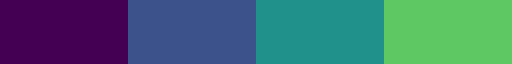

In [15]:
cmap_legend, norm_legend = matplotlib.colors.from_levels_and_colors(levels_legend, clrs_legend, extend='both')
cmap_legend

In [16]:
summary_stats = pd.read_csv('Summary_Stats.csv')
summary_stats

,Unnamed: 0,Compare,TruePositive,FalsePositive,FalseNegative,TrueNegative,TPR,FPR,PPV,FOR,F1,ACC,MCC,Prob,Group,obs,pp,reals,iter,rej
0,0,comp_prob_0_R25_pp10_real10_0_rej.shp,6369.0,12133.0,172.0,26371.0,0.973704,0.315110,0.344233,0.006480,0.341062,0.726829,0.471638,0,1,R25,pp10,10,0,rej.shp
1,1,comp_prob_10_R25_pp10_real10_0_rej.shp,6369.0,12133.0,172.0,26371.0,0.973704,0.315110,0.344233,0.006480,0.341062,0.726829,0.471638,10,1,R25,pp10,10,0,rej.shp
2,2,comp_prob_20_R25_pp10_real10_0_rej.shp,5985.0,5792.0,556.0,32712.0,0.914998,0.150426,0.508194,0.016713,0.485283,0.859074,0.613003,20,1,R25,pp10,10,0,rej.shp
3,3,comp_prob_30_R25_pp10_real10_0_rej.shp,5508.0,3461.0,1033.0,35043.0,0.842073,0.089887,0.614115,0.028634,0.550690,0.900233,0.663620,30,1,R25,pp10,10,0,rej.shp
4,4,comp_prob_40_R25_pp10_real10_0_rej.shp,5060.0,1683.0,1481.0,36821.0,0.773582,0.043710,0.750408,0.038666,0.615272,0.929759,0.720750,40,1,R25,pp10,10,0,rej.shp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,5275,comp_prob_60_C100_pp50_real500_4_rej.shp,5503.0,113.0,1038.0,38391.0,0.841309,0.002935,0.979879,0.026326,0.827021,0.974448,0.894111,60,12,C100,pp50,500,4,rej.shp
5276,5276,comp_prob_70_C100_pp50_real500_4_rej.shp,5186.0,40.0,1355.0,38464.0,0.792845,0.001039,0.992346,0.034029,0.788026,0.969031,0.871092,70,12,C100,pp50,500,4,rej.shp
5277,5277,comp_prob_80_C100_pp50_real500_4_rej.shp,4758.0,11.0,1783.0,38493.0,0.727412,0.000286,0.997693,0.044270,0.726190,0.960173,0.832622,80,12,C100,pp50,500,4,rej.shp
5278,5278,comp_prob_90_C100_pp50_real500_4_rej.shp,4201.0,1.0,2340.0,38503.0,0.642257,0.000026,0.999762,0.057293,0.642158,0.948030,0.777999,90,12,C100,pp50,500,4,rej.shp


In [23]:
os.makedirs(os.path.join(cwd,'PRT_Prob_Truth_Mapview'), exist_ok=True)

Group1 = []
Group2 = []
Group3 = []
Group4 = []
Group5 = []
Group6 = []
Group7 = []
Group8 = []
Group9 = []
Group10 = []
Group11 = []
Group12 = []
for scenario in scenario_folders:
    
    if scenario.startswith('R25_pp10'):
        Group1+=[scenario]
    if scenario.startswith('R100_pp10'):
        Group2+=[scenario]
    if scenario.startswith('C25_pp10'):
        Group3+=[scenario]
    if scenario.startswith('C100_pp10'):
        Group4+=[scenario]
    if scenario.startswith('R25_pp25'):
        Group5+=[scenario]
    if scenario.startswith('R100_pp25'):
        Group6+=[scenario]
    if scenario.startswith('C25_pp25'):
        Group7+=[scenario]
    if scenario.startswith('C100_pp25'):
        Group8+=[scenario]
    if scenario.startswith('R25_pp50'):
        Group9+=[scenario]
    if scenario.startswith('R100_pp50'):
        Group10+=[scenario]
    if scenario.startswith('C25_pp50'):
        Group11+=[scenario]
    if scenario.startswith('C100_pp50'):
        Group12+=[scenario]

Groups = [Group1, Group2, Group3, Group4, Group5, Group6, Group7, Group8, Group9, Group10, Group11, Group12]

for group in Groups:
    #print('Group:', group)

    if group[0].startswith('R25_pp10'):
        filtergroup = 1
        obs = 'Obs: Random 25'
        pp = 'PP: 800'
        filesave = 'R25_pp10'
    if group[0].startswith('R100_pp10'):
        filtergroup = 2
        obs = 'Obs: Random 100'
        pp = 'PP: 800'
        filesave = 'R100_pp10'
    if group[0].startswith('C25_pp10'):
        filtergroup = 3
        obs = 'Obs: Clustered 25'
        pp = 'PP: 800'
        filesave = 'C25_pp10'
    if group[0].startswith('C100_pp10'):
        filtergroup = 4
        obs = 'Obs: Clustered 100'
        pp = 'PP: 800'
        filesave = 'C100_pp10'
    if group[0].startswith('R25_pp25'):
        filtergroup = 5
        obs = 'Obs: Random 25'
        pp = 'PP: 128'
        filesave = 'R25_pp25'
    if group[0].startswith('R100_pp25'):
        filtergroup = 6
        obs = 'Obs: Random 100'
        pp = 'PP: 128'
        filesave = 'R100_pp25'
    if group[0].startswith('C25_pp25'):
        filtergroup = 7
        obs = 'Obs: Clustered 25'
        pp = 'PP: 128'
        filesave = 'C25_pp25'
    if group[0].startswith('C100_pp25'):
        filtergroup = 8
        obs = 'Obs: Clustered 100'
        pp = 'PP: 128'
        filesave = 'C100_pp25'
    if group[0].startswith('R25_pp50'):
        filtergroup = 9
        obs = 'Obs: Random 25'
        pp = 'PP: 32'
        filesave = 'R25_pp50'
    if group[0].startswith('R100_pp50'):
        filtergroup = 10
        obs = 'Obs: Random 100'
        pp = 'PP: 32'
        filesave = 'R100_pp50'
    if group[0].startswith('C25_pp50'):
        filtergroup = 11
        obs = 'Obs: Clustered 25'
        pp = 'PP: 32'
        filesave = 'C25_pp50'
    if group[0].startswith('C100_pp50'):
        filtergroup = 12
        obs = 'Obs: Clustered 100'
        pp = 'PP: 32'
        filesave = 'C100_pp50'  

    summary_stats_filtered = summary_stats[summary_stats['Group'] == filtergroup]
        
    for i in range(0,5,1): #(1,5,1)
        #print('i: ',i)
        iteration = i
        summary_stats_filtered_iter = summary_stats_filtered[summary_stats_filtered['iter']==i]

        for file in group:
            if file.endswith('real10'):
                reals10=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r10 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==10) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r10_mcc = round(summary_stats_filtered_iter_r10['MCC'].to_numpy()[0],2)
                prob10_10 = reals10[reals10['prob']>=10]
                prob10_10 = prob10_10.dissolve().explode()
                prob30_10 = reals10[reals10['prob']>=30]
                prob30_10 = prob30_10.dissolve().explode()
                prob50_10 = reals10[reals10['prob']>=50]
                prob50_10 = prob50_10.dissolve().explode()
                prob70_10 = reals10[reals10['prob']>=70]
                prob70_10 = prob70_10.dissolve().explode()
                prob90_10 = reals10[reals10['prob']>=90]
                prob90_10 = prob90_10.dissolve().explode()
            if file.endswith('real25'):
                reals25=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r25 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==25) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r25_mcc = round(summary_stats_filtered_iter_r25['MCC'].to_numpy()[0],2)
                prob10_25 = reals25[reals25['prob']>=10]
                prob10_25 = prob10_25.dissolve().explode()
                prob30_25 = reals25[reals25['prob']>=30]
                prob30_25 = prob30_25.dissolve().explode()
                prob50_25 = reals25[reals25['prob']>=50]
                prob50_25 = prob50_25.dissolve().explode()
                prob70_25 = reals25[reals25['prob']>=70]
                prob70_25 = prob70_25.dissolve().explode()
                prob90_25 = reals25[reals25['prob']>=90]
                prob90_25 = prob90_25.dissolve().explode()
            if file.endswith('real50'):
                reals50=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r50 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==50) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r50_mcc = round(summary_stats_filtered_iter_r50['MCC'].to_numpy()[0],2)
                prob10_50 = reals50[reals50['prob']>=10]
                prob10_50 = prob10_50.dissolve().explode()
                prob30_50 = reals50[reals50['prob']>=30]
                prob30_50 = prob30_50.dissolve().explode()
                prob50_50 = reals50[reals50['prob']>=50]
                prob50_50 = prob50_50.dissolve().explode()
                prob70_50 = reals50[reals50['prob']>=70]
                prob70_50 = prob70_50.dissolve().explode()
                prob90_50 = reals50[reals50['prob']>=90]
                prob90_50 = prob90_50.dissolve().explode()
            if file.endswith('real100'):
                reals100=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r100 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==100) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r100_mcc = round(summary_stats_filtered_iter_r100['MCC'].to_numpy()[0],2)
                prob10_100 = reals100[reals100['prob']>=10]
                prob10_100 = prob10_100.dissolve().explode()
                prob30_100 = reals100[reals100['prob']>=30]
                prob30_100 = prob30_100.dissolve().explode()
                prob50_100 = reals100[reals100['prob']>=50]
                prob50_100 = prob50_100.dissolve().explode()
                prob70_100 = reals100[reals100['prob']>=70]
                prob70_100 = prob70_100.dissolve().explode()
                prob90_100 = reals100[reals100['prob']>=90]
                prob90_100 = prob90_100.dissolve().explode()
            if file.endswith('real250'):
                reals250=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r250 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==250) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r250_mcc = round(summary_stats_filtered_iter_r250['MCC'].to_numpy()[0],2)
                prob10_250 = reals250[reals250['prob']>=10]
                prob10_250 = prob10_250.dissolve().explode()
                prob30_250 = reals250[reals250['prob']>=30]
                prob30_250 = prob30_250.dissolve().explode()
                prob50_250 = reals250[reals250['prob']>=50]
                prob50_250 = prob50_250.dissolve().explode()
                prob70_250 = reals250[reals250['prob']>=70]
                prob70_250 = prob70_250.dissolve().explode()
                prob90_250 = reals250[reals250['prob']>=90]
                prob90_250 = prob90_250.dissolve().explode()
            if file.endswith('real500'):
                reals500=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r500 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==500) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r500_mcc = round(summary_stats_filtered_iter_r500['MCC'].to_numpy()[0],2)
                prob10_500 = reals500[reals500['prob']>=10]
                prob10_500 = prob10_500.dissolve().explode()
                prob30_500 = reals500[reals500['prob']>=30]
                prob30_500 = prob30_500.dissolve().explode()
                prob50_500 = reals500[reals500['prob']>=50]
                prob50_500 = prob50_500.dissolve().explode()
                prob70_500 = reals500[reals500['prob']>=70]
                prob70_500 = prob70_500.dissolve().explode()
                prob90_500 = reals500[reals500['prob']>=90]
                prob90_500 = prob90_500.dissolve().explode()
            if file.endswith('real1000'):
                reals1000=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r1000 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==1000) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r1000_mcc = round(summary_stats_filtered_iter_r1000['MCC'].to_numpy()[0],2)
                prob10_1000 = reals1000[reals1000['prob']>=10]
                prob10_1000 = prob10_1000.dissolve().explode()
                prob30_1000 = reals1000[reals1000['prob']>=30]
                prob30_1000 = prob30_1000.dissolve().explode()
                prob50_1000 = reals1000[reals1000['prob']>=50]
                prob50_1000 = prob50_1000.dissolve().explode()
                prob70_1000 = reals1000[reals1000['prob']>=70]
                prob70_1000 = prob70_1000.dissolve().explode()
                prob90_1000 = reals1000[reals1000['prob']>=90]
                prob90_1000 = prob90_1000.dissolve().explode()
            if file.endswith('real2000'):
                reals2000=gpd.read_file(os.path.join(cwd, file, f'{file}_{i}_rej.shp'), engine='pyogrio')
                summary_stats_filtered_iter_r2000 = summary_stats_filtered_iter[(summary_stats_filtered_iter['reals']==2000) & (summary_stats_filtered_iter['Prob']==50)]
                summary_stats_filtered_iter_r2000_mcc = round(summary_stats_filtered_iter_r2000['MCC'].to_numpy()[0],2)
                prob10_2000 = reals2000[reals2000['prob']>=10]
                prob10_2000 = prob10_2000.dissolve().explode()
                prob30_2000 = reals2000[reals2000['prob']>=30]
                prob30_2000 = prob30_2000.dissolve().explode()
                prob50_2000 = reals2000[reals2000['prob']>=50]
                prob50_2000 = prob50_2000.dissolve().explode()
                prob70_2000 = reals2000[reals2000['prob']>=70]
                prob70_2000 = prob70_2000.dissolve().explode()
                prob90_2000 = reals2000[reals2000['prob']>=90]
                prob90_2000 = prob90_2000.dissolve().explode()

        # Make figure
        fig = plt.figure(figsize=(15,10))
        plt.rcParams['font.family'] = 'Calibri'
        ax1 = plt.subplot2grid((10,15), (0,0), rowspan=5, colspan=3) # (subplot grid, num rows, num cols), (start row, start col)
        ax2 = plt.subplot2grid((10,15), (0,3), rowspan=5, colspan=3)
        ax3 = plt.subplot2grid((10,15), (0,6), rowspan=5, colspan=3)
        ax4 = plt.subplot2grid((10,15), (0,9), rowspan=5, colspan=3)
        ax5 = plt.subplot2grid((10,15), (5,0), rowspan=5, colspan=3)
        ax6 = plt.subplot2grid((10,15), (5,3), rowspan=5, colspan=3)
        ax7 = plt.subplot2grid((10,15), (5,6), rowspan=5, colspan=3)
        ax8 = plt.subplot2grid((10,15), (5,9), rowspan=5, colspan=3)
    
        # ax1
        ax1.axis('off')
        ax1.set_title("Realizations: 10", fontsize=12)
        ax1.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax1.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax1, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax1, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax1, edgecolor='red')
        prob10_10.plot(ax=ax1, color='#440154')
        prob30_10.plot(ax=ax1, color='#3b528b')
        prob50_10.plot(ax=ax1, color='#21918c')
        prob50_10.boundary.plot(ax=ax1, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_10.plot(ax=ax1, color='#5ec962')
        prob90_10.plot(ax=ax1, color='#fde725')

        # ax2
        ax2.axis('off')
        ax2.set_title("Realizations: 25", fontsize=12)
        ax2.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax2.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax2, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax2, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax2, edgecolor='red')
        prob10_25.plot(ax=ax2, color='#440154')
        prob30_25.plot(ax=ax2, color='#3b528b')
        prob50_25.plot(ax=ax2, color='#21918c')
        prob50_25.boundary.plot(ax=ax2, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_25.plot(ax=ax2, color='#5ec962')
        prob90_25.plot(ax=ax2, color='#fde725')

        # ax3
        ax3.axis('off')
        ax3.set_title("Realizations: 50", fontsize=12)
        ax3.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax3.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax3, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax3, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax3, edgecolor='red')
        prob10_50.plot(ax=ax3, color='#440154')
        prob30_50.plot(ax=ax3, color='#3b528b')
        prob50_50.plot(ax=ax3, color='#21918c')
        prob50_50.boundary.plot(ax=ax3, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_50.plot(ax=ax3, color='#5ec962')
        prob90_50.plot(ax=ax3, color='#fde725')

        # ax4
        ax4.axis('off')
        ax4.set_title("Realizations: 100", fontsize=12)
        ax4.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax4.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax4, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax4, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax4, edgecolor='red')
        prob10_100.plot(ax=ax4, color='#440154')
        prob30_100.plot(ax=ax4, color='#3b528b')
        prob50_100.plot(ax=ax4, color='#21918c')
        prob50_100.boundary.plot(ax=ax4, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_100.plot(ax=ax4, color='#5ec962')
        prob90_100.plot(ax=ax4, color='#fde725')

        # ax5
        ax5.axis('off')
        ax5.set_title("Realizations: 250", fontsize=12, y=0, pad=-15)
        ax5.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax5.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax5, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax5, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax5, edgecolor='red')
        prob10_250.plot(ax=ax5, color='#440154')
        prob30_250.plot(ax=ax5, color='#3b528b')
        prob50_250.plot(ax=ax5, color='#21918c')
        prob50_250.boundary.plot(ax=ax5, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_250.plot(ax=ax5, color='#5ec962')
        prob90_250.plot(ax=ax5, color='#fde725')

        # ax6
        ax6.axis('off')
        ax6.set_title("Realizations: 500", fontsize=12, y=0, pad=-15)
        ax6.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax6.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax6, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax6, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax6, edgecolor='red')
        prob10_500.plot(ax=ax6, color='#440154')
        prob30_500.plot(ax=ax6, color='#3b528b')
        prob50_500.plot(ax=ax6, color='#21918c')
        prob50_500.boundary.plot(ax=ax6, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_500.plot(ax=ax6, color='#5ec962')
        prob90_500.plot(ax=ax6, color='#fde725')

        # ax7
        ax7.axis('off')
        ax7.set_title("Realizations: 1000", fontsize=12, y=0, pad=-15)
        ax7.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax7.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax7, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax7, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax7, edgecolor='red')
        prob10_1000.plot(ax=ax7, color='#440154')
        prob30_1000.plot(ax=ax7, color='#3b528b')
        prob50_1000.plot(ax=ax7, color='#21918c')
        prob50_1000.boundary.plot(ax=ax7, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_1000.plot(ax=ax7, color='#5ec962')
        prob90_1000.plot(ax=ax7, color='#fde725')

        # ax8
        ax8.axis('off')
        ax8.set_title("Realizations: 2000", fontsize=12, y=0, pad=-15)
        ax8.set_xlim([gridoutline_gpd.bounds.minx[0]-10, gridoutline_gpd.bounds.maxx[0]+10])
        ax8.set_ylim([gridoutline_gpd.bounds.miny[0]-10, gridoutline_gpd.bounds.maxy[0]+10])
        gridoutline_gpd.plot(ax=ax8, color='none', edgecolor='black', linewidth=1, zorder=9)
        basegrid_noflow.plot(ax=ax8, color='black', zorder=10)
        true_cap.boundary.plot(ax=ax8, edgecolor='red')
        prob10_2000.plot(ax=ax8, color='#440154')
        prob30_2000.plot(ax=ax8, color='#3b528b')
        prob50_2000.plot(ax=ax8, color='#21918c')
        prob50_2000.boundary.plot(ax=ax8, edgecolor='black', zorder=8, linestyle='dashed', linewidth=1)
        prob70_2000.plot(ax=ax8, color='#5ec962')
        prob90_2000.plot(ax=ax8, color='#fde725')

        cbar_ax = fig.add_axes([0.18, 0.01, 0.5, 0.15])
        cbar_ax.axis('off')
        legend_colorbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm_legend, cmap=cmap_legend), ax=cbar_ax, orientation='horizontal', ticks=[10,30,50,70,90])
        legend_colorbar.ax.tick_params(labelfontfamily='calibri', labelsize=10)
        legend_colorbar.ax.set_title('% Probability of Capture', family='calibri', fontsize=10)

        if iteration == 0:
            fig.suptitle(f'{obs}  {pp}  Prior', fontsize=16, fontweight='bold', y=0.94, x=0.44)
        if iteration != 0:
            fig.suptitle(f'{obs}  {pp}  Posterior: {iteration}', fontsize=16, fontweight='bold', y=0.94, x=0.44)

        plt.gcf().text(0.187, 0.865, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r10_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.345, 0.865, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r25_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.503, 0.865, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r50_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.658, 0.865, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r100_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.187, 0.475, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r250_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.345, 0.475, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r500_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.503, 0.475, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r1000_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        plt.gcf().text(0.657, 0.475, (r"$\bf{---}$" + f'MCC: {summary_stats_filtered_iter_r2000_mcc}'), fontsize=10, path_effects=[path_effects.withStroke(linewidth=2, foreground='white')])
        fig.savefig(os.path.join(cwd,'PRT_Prob_Truth_Mapview',f'{filesave}_{i}.png'), bbox_inches='tight', dpi=300)
        print('saved', os.path.join(cwd,'PRT_Prob_Truth_Mapview',f'{filesave}_{i}.png'))
        plt.close()

saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R25_pp10_0.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R25_pp10_1.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R25_pp10_2.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R25_pp10_3.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R25_pp10_4.png


C:\Users\farnut1\AppData\Local\Temp\ipykernel_22376\1350067428.py:254: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  prob90_10.plot(ax=ax1, color='#fde725')


saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R100_pp10_0.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R100_pp10_1.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R100_pp10_2.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R100_pp10_3.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\R100_pp10_4.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\C25_pp10_0.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\C25_pp10_1.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\C25_pp10_2.png
saved C:\Users\farnut1\Desktop\How-Many-Realizations-main\PRT_Notebook\PRT_Prob_Truth_Mapview\C25_pp10_3.png
saved C:\Users